In [ ]:
import pandas as pd
import numpy as np
import json
import re
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount("/content/gdrive")
import nltk

Mounted at /content/gdrive


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/NLP/dropped.csv')
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [ ]:
df.head()

,Unnamed: 0,title,NER
0,0,No-Bake Nut Cookies,brown sugar milk vanilla nuts butter bite size...
1,1,Jewell Ball'S Chicken,beef chicken breasts cream of mushroom soup so...
2,2,Creamy Corn,frozen corn cream cheese butter garlic powder ...
3,3,Chicken Funny,chicken chicken gravy cream of mushroom soup s...
4,4,Reeses Cups(Candy),peanut butter graham cracker crumbs butter pow...


In [ ]:
df['NER']=df['NER'].str.replace('[','')
df['NER']=df['NER'].str.replace(']','')
df['NER']=df['NER'].str.replace('"','')
df['NER']=df['NER'].str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# # NMF is able to use tf-idf
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
# tfidf = tfidf_vectorizer.fit_transform(df['NER'])
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(df['NER'])
tf_feature_names = tf_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 20

# Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
egg yolks whites sugar flour vanilla salt yolk tartar bread
Topic 1:
oil olive garlic fresh virgin extra salt basil parsley tomatoes
Topic 2:
cream sour soup heavy mushroom whipping cheese ice tartar onions
Topic 3:
juice lemon orange lime zest fresh mayonnaise rind honey apple
Topic 4:
chicken broth breasts soup rice mushrooms mushroom broccoli margarine breast
Topic 5:
baking powder flour soda salt shortening buttermilk eggs oil vegetable
Topic 6:
ground beef black cumin freshly nutmeg ginger cinnamon cloves tomato
Topic 7:
water yeast flour boiling salt cold sugar shortening warm cornstarch
Topic 8:
butter flour peanut unsalted salt sugar powdered potatoes bread purpose
Topic 9:
sugar brown cinnamon apples nutmeg raisins cloves soda oats pumpkin
Topic 10:
sauce soy worcestershire tomato garlic chili sesame ginger beef rice
Topic 11:
milk condensed salt coconut flour bread nutmeg yeast cracker graham
Topic 12:
vanilla eggs sugar cocoa margarine flour powdered pecans nuts ext

In [ ]:
def plot_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        #fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


IndexError: ignored

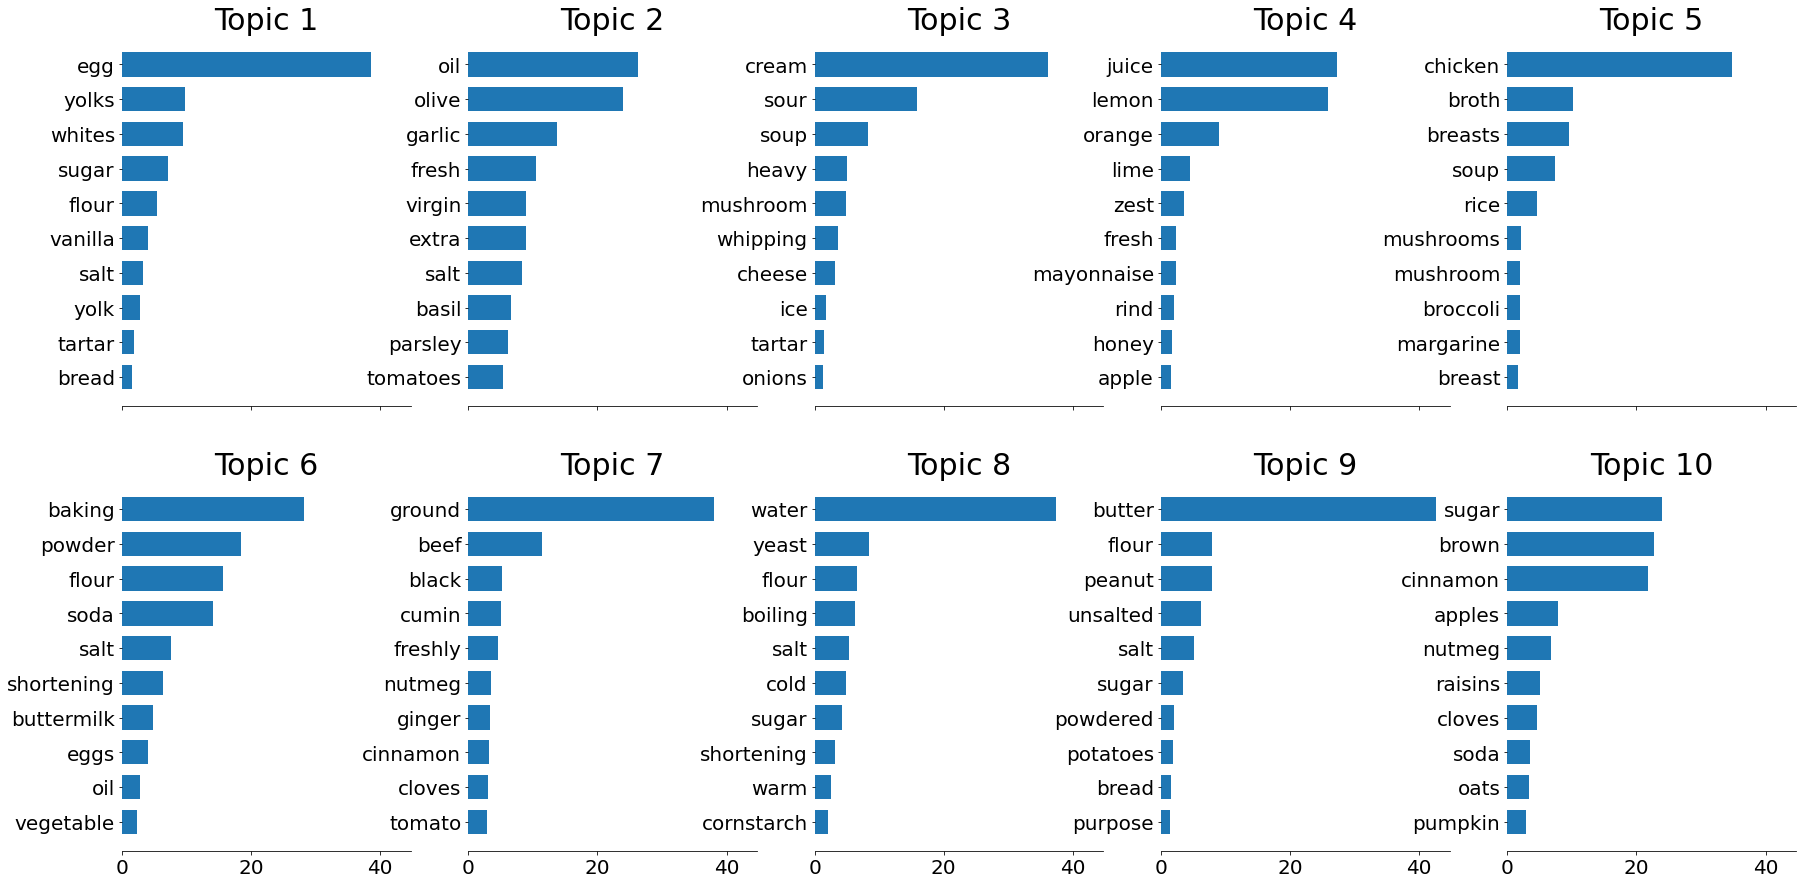

In [ ]:
plot_top_words(nmf, tfidf_feature_names, no_top_words)

In [ ]:
topic_values = NMF.transform(tfidf)
topic_values.shape


TypeError: ignored

In [ ]:
# Run LDA
no_topics = 20
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

NameError: ignored

In [ ]:
lda.perplexity(tf, sub_sampling=False)

220.28215165925172

In [ ]:
lda_output = lda.fit_transform(tf)

NameError: ignored